In [183]:
NAME = "GROUP 21 - GROUP PROJECT"
COLLABORATORS = "WILD BUNCH"

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# We will use matplotlib to plot figures
import matplotlib.pyplot as plt

# For regression analysis we will use the statsmodels package
import statsmodels.api as sm
from statsmodels.formula.api import ols

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit
import math
from scipy.stats import boxcox
from statsmodels.tools.eval_measures import rmse

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import re as re

In [185]:
url = "https://raw.githubusercontent.com/jpolakov/DS2_Group21_Project/main/winemag-data-130k-v2.csv"
df = pd.read_csv(url, index_col= 0)
df.head()
df.shape


(129971, 13)

In [186]:
#df.describe

In [187]:
# Find number of duplicate records
df._duplicates = df.duplicated()
print ('Number of duplicate records:{}'.format(df._duplicates.sum()))

Number of duplicate records:9983


C:\Users\ewright\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [188]:
# Drop duplicates (9983 records)
df = df.drop_duplicates()
df.shape


(119988, 13)

### Checkpoint
- Folloing columns will not be used in the analysis:

- 'description','designation', 'region_2','taster_twitter_handle' 


In [189]:
# Remove Region_1 and Region_2 from the analysis
#df=df.drop(columns=['description','designation', 'region_2','taster_twitter_handle'], inplace=True)
df.drop(columns=['description','designation','region_2','taster_twitter_handle'], inplace=True)


In [190]:
df

,country,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [191]:
#Find number of missing values per column
df.isnull().sum()

country           59
points             0
price           8395
province          59
region_1       19560
taster_name    24917
title              0
variety            1
winery             0
dtype: int64

### Checkpoint
- number of missing values for "country" column is matching the number of missing values for "province" column
- both are important columns used in analysis 
- we need to drop null value records

In [192]:
# MISSING DATA FIX for empty values in "country", "price" and 'variety' columns
#df.drop(df.loc[df['country'] >= 91 ].index, inplace=True)
df.dropna(subset=['country','price', 'variety'], inplace=True)

In [193]:
df.shape


(111537, 9)

In [194]:
#Find number of missing values per column
df.isnull().sum()

country            0
points             0
price              0
province           0
region_1       17957
taster_name    23272
title              0
variety            0
winery             0
dtype: int64

### Checkpoint
- number of missing values  looks better, no missing values for important columns: country, points, price, province, winery
- we are going to accept that some of the reviews does not have a name of the tester
- we do not care much about reagion for global datest, hoping there will no missing values for smaller focus datasets(US/California/etc)

### CREATING FOCUS DATASETS : 
- Focus Set 1 : US dataset (50k+ = almost 50% rows of total world dataset)
- Focus Set 2 : California (33k+ = 66% percent of US data subset)

In [195]:
# creating new US dataframe called "df_US" 
df_US = df 
df_US.shape

(111537, 9)

In [196]:
#df_US[df_US.country != 'US']
df_US.drop(df_US.loc[df_US['country'] != 'US' ].index, inplace=True)
df_US.shape

(50238, 9)

In [197]:
df_US.province.value_counts()

California           33526
Washington            7913
Oregon                4917
New York              2444
Virginia               718
Idaho                  177
Michigan               103
Texas                   89
America                 84
Colorado                62
New Mexico              44
Arizona                 38
Missouri                33
North Carolina          22
Pennsylvania            17
Ohio                    10
New Jersey               8
Washington-Oregon        7
Massachusetts            6
Illinois                 5
Iowa                     4
Nevada                   3
Connecticut              3
Vermont                  2
Kentucky                 1
Rhode Island             1
Hawaii                   1
Name: province, dtype: int64

In [198]:
# creating new CALIFORNIA dataframe called "df_US" 
df_CAL = df_US
df_CAL = df_CAL.drop(df_CAL.loc[df_CAL['province'] != 'California' ].index)
df_CAL.shape

(33526, 9)

In [199]:
df_CAL.variety.value_counts()

Pinot Noir            6398
Cabernet Sauvignon    5308
Chardonnay            4759
Zinfandel             2452
Syrah                 1742
                      ... 
Refosco                  1
Moscato Giallo           1
Prosecco                 1
Viognier-Valdiguié       1
Viognier-Marsanne        1
Name: variety, Length: 193, dtype: int64

In [200]:
#Create df_CAL_SELECTION dataframe as a selection of California dataset with "variety" count higher than 25
df_CAL_SELECTION = df_CAL[df_CAL.groupby('variety').variety.transform('count')>25].copy()
df_CAL_SELECTION.variety.value_counts()

Pinot Noir                  6398
Cabernet Sauvignon          5308
Chardonnay                  4759
Zinfandel                   2452
Syrah                       1742
Sauvignon Blanc             1669
Red Blend                   1656
Merlot                      1295
Bordeaux-style Red Blend     819
Petite Sirah                 632
Sparkling Blend              513
Rosé                         462
Rhône-style Red Blend        451
Viognier                     396
Grenache                     345
White Blend                  335
Cabernet Franc               331
Pinot Grigio                 268
Riesling                     239
Sangiovese                   236
Malbec                       181
Barbera                      175
Pinot Gris                   173
Meritage                     170
Rhône-style White Blend      152
Gewürztraminer               130
Tempranillo                  124
Mourvèdre                    115
G-S-M                        102
Petit Verdot                  99
Albariño  

In [201]:
df_CAL_SELECTION.shape

(32759, 9)

In [202]:
df_CAL_SELECTION.isnull().sum()

country            0
points             0
price              0
province           0
region_1           2
taster_name    15036
title              0
variety            0
winery             0
dtype: int64

In [203]:
df_CAL_SELECTION.dropna(subset=['region_1'], inplace=True)
df_CAL_SELECTION.region_1.isnull().sum()

0

In [204]:
df_CAL_SELECTION.fillna(value="Unknown", inplace=True)
df_CAL_SELECTION.taster_name.isnull().sum()

0

In [205]:
df_CAL_SELECTION.shape

(32757, 9)

In [206]:
df_CAL_SELECTION.reset_index(drop=True, inplace=True)

df_CAL_SELECTION.head(2)

,country,points,price,province,region_1,taster_name,title,variety,winery
0,US,87,19.0,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
1,US,87,34.0,California,Alexander Valley,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [207]:
df_CAL_cm=df_CAL_SELECTION.corr(method='pearson') 
df_CAL_cm

,points,price
points,1.000000,0.447159
price,0.447159,1.000000


In [208]:
CAL_model = ols('points ~ price', data=df_CAL_SELECTION).fit()
CAL_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     8186.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:56:19   Log-Likelihood:                -82103.
No. Observations:               32757   AIC:                         1.642e+05
Df Residuals:                   32755   BIC:                         1.642e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7410      0.026   3273.657      0.000      86.689      86.793
price          0.0479      0.001     90.478      0.000       0.047       0.049
==============================================================================
Omnibus:                    14243.064   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1121257.507
Skew:                          -1.213   Prob(JB):                         0.00
Kurtosis:                      31.559   Cond. No.                         80.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

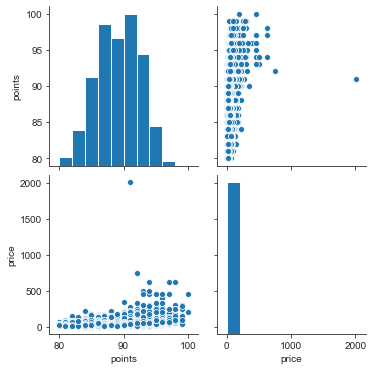

In [209]:
sns.axes_style("whitegrid")
sns.set_style('ticks')
sns.pairplot(df_CAL_SELECTION);

In [210]:
df_CAL_SELECTION['log_price']=np.log(df_CAL_SELECTION.price)

In [211]:
df_CAL_cm=df_CAL_SELECTION.corr(method='pearson') 
df_CAL_cm

,points,price,log_price
points,1.000000,0.447159,0.569261
price,0.447159,1.000000,0.826701
log_price,0.569261,0.826701,1.000000


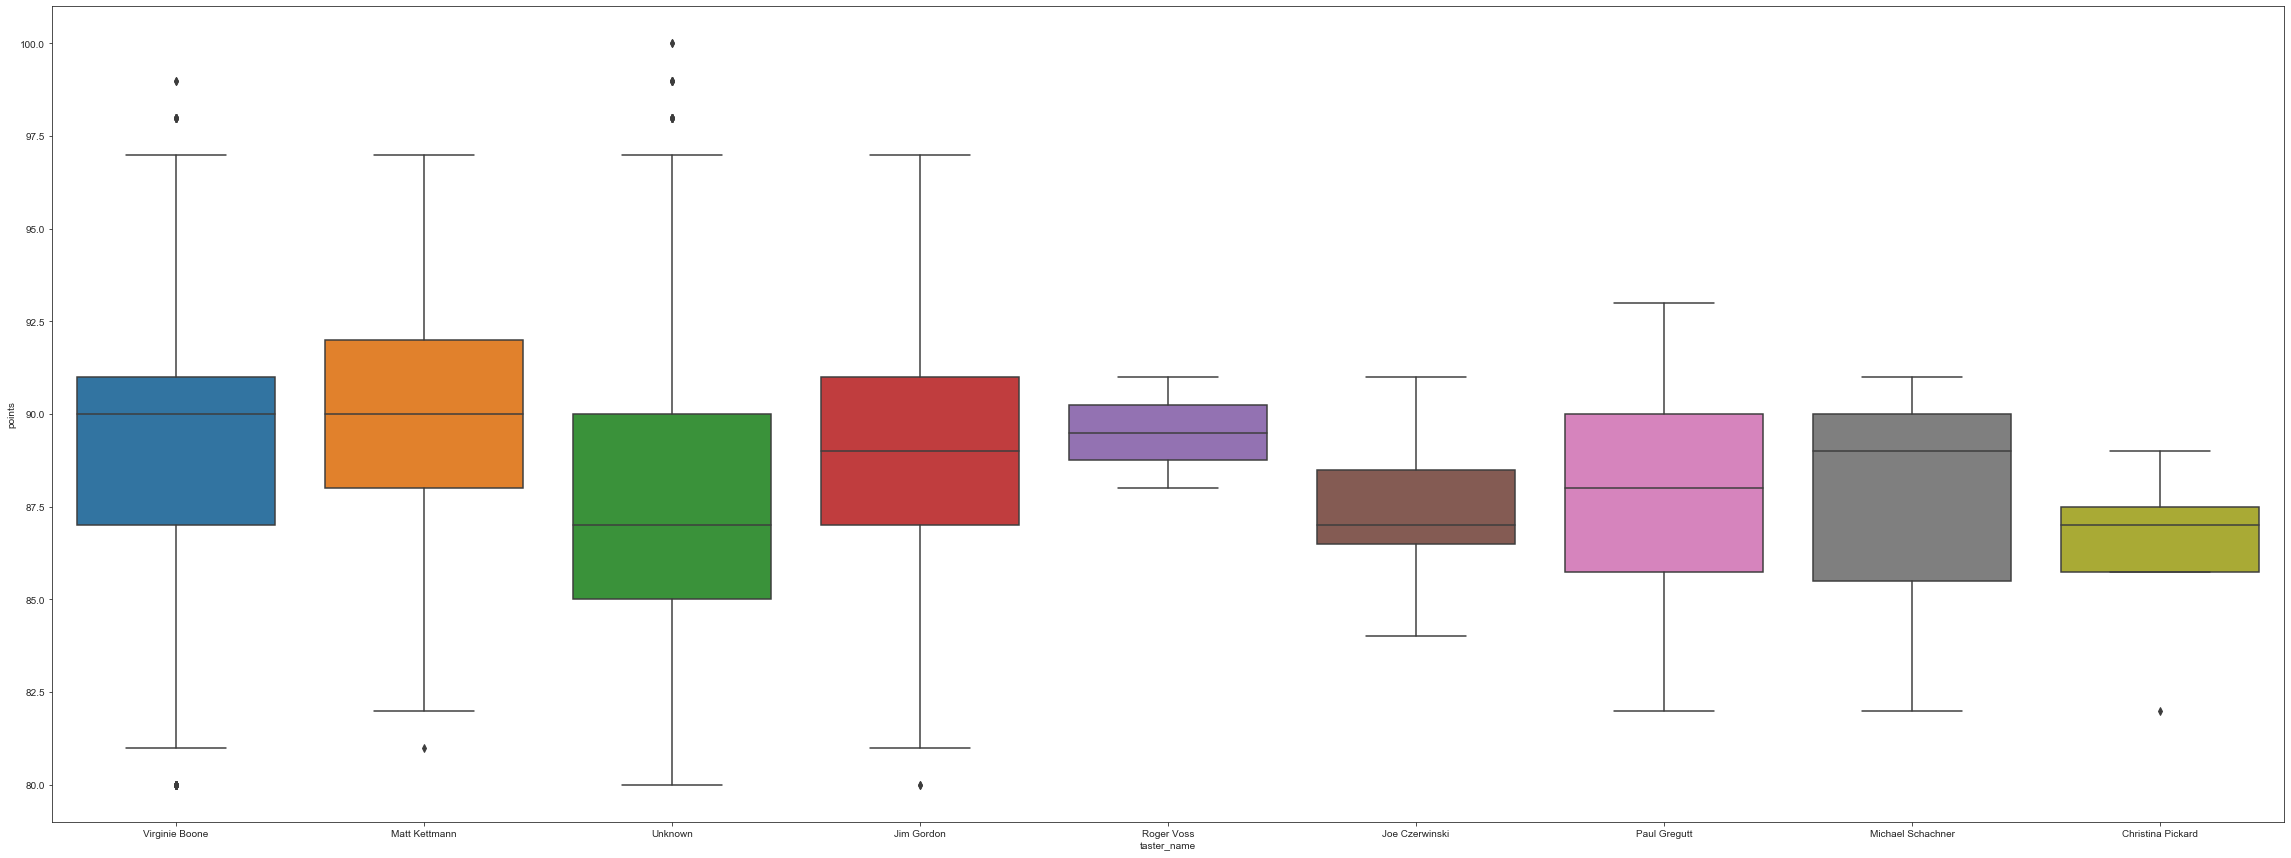

In [212]:
plt.figure(figsize=(40, 15))
sns.boxplot(x='taster_name', y='points', data=df_CAL_SELECTION);

In [213]:
df_CAL_SELECTION['region_1'].value_counts()

Napa Valley                           4095
Russian River Valley                  2816
California                            2409
Paso Robles                           2059
Sonoma Coast                          1363
                                      ... 
Sonoma County-Santa Barbara County       1
Napa-Amador                              1
Sonoma-Napa-Monterey                     1
Napa Valley-Paso Robles                  1
Lake-Sonoma-Napa                         1
Name: region_1, Length: 180, dtype: int64

### Simplifying the regions into North Coast, Central Coast, Sierra Foothils, Inland Valley, and Southern California

In [214]:
df_CAL_clean_regions = pd.DataFrame(df_CAL_SELECTION)
df_CAL_clean_regions

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
0,US,87,19.0,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2.944439
1,US,87,34.0,California,Alexander Valley,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,3.526361
2,US,87,12.0,California,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,2.484907
3,US,87,22.0,California,Paso Robles,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,3.091042
4,US,87,69.0,California,Sonoma Coast,Virginie Boone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,4.234107
...,...,...,...,...,...,...,...,...,...,...
32752,US,90,35.0,California,Sonoma County,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,3.555348
32753,US,90,20.0,California,Santa Ynez Valley,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,2.995732
32754,US,90,35.0,California,Napa Valley,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,3.555348
32755,US,90,35.0,California,Napa Valley,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry,3.555348


In [215]:
ab_regions = df_CAL_clean_regions.region_1.unique()
ab_regions.sort()
ab_regions

array(['Adelaida District', 'Alexander Valley', 'Alta Mesa',
       'Amador County', 'Amador-Napa', 'Anderson Valley',
       'Antelope Valley of the California High Desert',
       'Arroyo Grande Valley', 'Arroyo Seco', 'Atlas Peak',
       'Ballard Canyon', 'Ben Lomond Mountain', 'Bennett Valley',
       'Big Valley District-Lake County', 'Calaveras County',
       'California', 'California Other', 'California-Oregon', 'Calistoga',
       'Capay Valley', 'Carmel Valley', 'Carneros',
       'Carneros-Napa Valley', 'Central Coast', 'Central Valley',
       'Chalk Hill', 'Chalone', 'Chiles Valley', 'Cienega Valley',
       'Clarksburg', 'Clear Lake', 'Clements Hills', 'Cole Ranch',
       'Contra Costa County', 'Coombsville', 'Cucamonga Valley',
       'Diamond Mountain District', 'Dry Creek Valley', 'Dunnigan Hills',
       'Edna Valley', 'El Dorado', 'El Dorado County',
       'El Pomar District', 'Fair Play', 'Fiddletown',
       'Fort Ross-Seaview', 'Green Valley', 'Guenoc Valley',


In [216]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Napa'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Lake County'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Los Carneros'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Mendocino'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Solano County'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Sonoma'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Alexander'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Clear Lake'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Anderson'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Redwood'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Carneros'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Bennett'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Dry Creek'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Chalk'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Green Valley'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Knight'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Rockpile'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ross'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Oak Knoll'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Atlas'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Calistoga'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Rutherford'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Helena'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Howell'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Veeder'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Chiles'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Diamond'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Stags'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Spring'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Yountville'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Cole'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Potter'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Coombs'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'High'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Guenoc'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Pine Mountain'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Humboldt'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Tehama'), 'region_1']='North Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'McDowell'), 'region_1']='North Coast'

In [217]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Livermore'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Monterey'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Paso Robles'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Benito'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Francisco'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Luis Obispo'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Santa Barbara'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Santa Clara'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Santa Cruz'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ynez'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Carmel'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Edna'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Lucas'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'York'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Arroyo'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ben Lomond'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Rita'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Santa'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Antonio'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Adelaida'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ballard'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Cienega'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Harlan'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Templeton'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Paicines'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Bernabe'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'El Pomar'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Sierra Pelona'), 'region_1']='Central Coast'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Lime Kiln'), 'region_1']='Central Coast'


In [218]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Amador'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Calaveras'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'El Dorado'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Nevada'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Placer'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Yuba'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Fair Play'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Shenandoah'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Fiddle'), 'region_1']='Sierra Foothills'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Tuolumne'), 'region_1']='Sierra Foothills'

In [219]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Lodi'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Madera'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Sacramento'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Joaquin'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Capay'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Russian River'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Yolo'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'River Junction'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Contra'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Dunnigan'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Central Valley'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Alta Mesa'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Clarksburg'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Clements'), 'region_1']='Inland Valleys'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Mokelumne'), 'region_1']='Inland Valleys'

In [220]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Cucamonga'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Los Angeles'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'San Diego'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Temecula'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Malibu'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Oakville'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Antelope'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Chalone'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Marin'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'South Coast'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Suisun'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ventura'), 'region_1']='Southern CA'
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Ramona'), 'region_1']='Southern CA'


In [221]:
df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'California'), 'region_1']='Other'

In [222]:
areas=pd.DataFrame(df_CAL_clean_regions['region_1'].value_counts())
areas.sort_values('region_1', ascending = False)

,region_1
North Coast,15554
Central Coast,9068
Inland Valleys,3784
Other,2415
Sierra Foothills,1285
Southern CA,651


In [241]:
#winery_other = pd.DataFrame(df_CAL_clean_regions.loc[df_CAL_clean_regions['region_1'].str.contains(r'Other'), 'winery'])
df_other=df_CAL_clean_regions
df_other.head(2)


,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
0,US,87,19.0,California,North Coast,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2.944439
1,US,87,34.0,California,North Coast,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,3.526361


In [242]:
df_other = df_other.drop(df_other.loc[df_other['region_1']!='Other'].index)
df_other.head(2)

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
14,US,86,12.0,California,Other,Jim Gordon,Cocobon 2014 Red (California),Red Blend,Cocobon,2.484907
103,US,85,16.0,California,Other,Unknown,Cline 2007 Ancient Vines Zinfandel (California),Zinfandel,Cline,2.772589


In [243]:
df_not_other=df_CAL_clean_regions
df_not_other = df_not_other.drop(df_not_other.loc[df_not_other['region_1']=='Other'].index)
df_not_other.head(2)

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
0,US,87,19.0,California,North Coast,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2.944439
1,US,87,34.0,California,North Coast,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,3.526361


In [244]:
top_region = pd.DataFrame(df_not_other.groupby(['winery']).region_1.value_counts())
top_region.drop(columns=['region_1'], inplace=True)
top_region.reset_index(inplace=True)
#top_region.set_index('winery', inplace=True)
top_region

,winery,region_1
0,10 Knots,Central Coast
1,1000 Stories,North Coast
2,1070 Green,North Coast
3,10Span,Central Coast
4,12C Wines,North Coast
...,...,...
4463,kukkula,Central Coast
4464,m2 Wines,North Coast
4465,un4seen,Inland Valleys
4466,Écluse,Central Coast


In [245]:
wine_dict = top_region.set_index('winery').to_dict()['region_1']
wine_dict



{'10 Knots': 'Central Coast',
 '1000 Stories': 'North Coast',
 '1070 Green': 'North Coast',
 '10Span': 'Central Coast',
 '12C Wines': 'North Coast',
 '16X20': 'North Coast',
 '181': 'Inland Valleys',
 '1850': 'Central Coast',
 '29 & Oak Wines': 'Southern CA',
 '2Plank': 'Southern CA',
 '2nd Chance': 'Central Coast',
 '3 Badge Beverage': 'Inland Valleys',
 '3 Spells': 'North Coast',
 '3 Steves Winery': 'Central Coast',
 '32 Winds': 'North Coast',
 '337 Wine Cellars': 'Inland Valleys',
 '3CV': 'Central Coast',
 '401K': 'North Coast',
 '50 Harvests': 'North Coast',
 '6 North': 'North Coast',
 '7 Heavenly Chards': 'Inland Valleys',
 '75 Wine Co.': 'North Coast',
 'A By Acacia': 'North Coast',
 'A Cellar Full of Noise': 'Central Coast',
 'A Donkey and Goat': 'Sierra Foothills',
 'A.P. Vin': 'Inland Valleys',
 'A.S. Kiken': 'North Coast',
 'AJB Vineyards': 'Central Coast',
 'AZS': 'North Coast',
 'Aaron': 'Central Coast',
 'Abbeyville': 'North Coast',
 "Abbot's Passage": 'North Coast',
 'Abi

In [246]:
df_other['region_1']=df_other['winery'].map(wine_dict)

In [247]:
df_other

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
14,US,86,12.0,California,NaN,Jim Gordon,Cocobon 2014 Red (California),Red Blend,Cocobon,2.484907
103,US,85,16.0,California,Inland Valleys,Unknown,Cline 2007 Ancient Vines Zinfandel (California),Zinfandel,Cline,2.772589
104,US,85,15.0,California,NaN,Unknown,Vinavanti 2005 Le Bon Viveur Red (California),Red Blend,Vinavanti,2.708050
106,US,85,12.0,California,NaN,Unknown,Morro Bay 2006 Split Oak Vineyard Cabernet Sau...,Cabernet Sauvignon,Morro Bay,2.484907
107,US,89,30.0,California,Central Coast,Jim Gordon,Las Positas 2014 Verdigris White (California),White Blend,Las Positas,3.401197
...,...,...,...,...,...,...,...,...,...,...
32686,US,84,18.0,California,Central Coast,Unknown,Martin Ray 2008 Dessert Wine Red (California),Red Blend,Martin Ray,2.890372
32706,US,87,23.0,California,Inland Valleys,Unknown,Passaggio 2011 New Generation Unoaked Chardonn...,Chardonnay,Passaggio,3.135494
32707,US,87,22.0,California,North Coast,Unknown,Chandon NV Brut Classic Sparkling (California),Sparkling Blend,Chandon,3.091042
32708,US,87,22.0,California,North Coast,Unknown,Chandon NV Rosé Sparkling (California),Sparkling Blend,Chandon,3.091042


In [255]:
Final_CAL_df=pd.concat([df_other, df_not_other], axis=0)  
Final_CAL_df



,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
14,US,86,12.0,California,NaN,Jim Gordon,Cocobon 2014 Red (California),Red Blend,Cocobon,2.484907
103,US,85,16.0,California,Inland Valleys,Unknown,Cline 2007 Ancient Vines Zinfandel (California),Zinfandel,Cline,2.772589
104,US,85,15.0,California,NaN,Unknown,Vinavanti 2005 Le Bon Viveur Red (California),Red Blend,Vinavanti,2.708050
106,US,85,12.0,California,NaN,Unknown,Morro Bay 2006 Split Oak Vineyard Cabernet Sau...,Cabernet Sauvignon,Morro Bay,2.484907
107,US,89,30.0,California,Central Coast,Jim Gordon,Las Positas 2014 Verdigris White (California),White Blend,Las Positas,3.401197
...,...,...,...,...,...,...,...,...,...,...
32752,US,90,35.0,California,North Coast,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,3.555348
32753,US,90,20.0,California,Central Coast,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,2.995732
32754,US,90,35.0,California,North Coast,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,3.555348
32755,US,90,35.0,California,North Coast,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry,3.555348


In [258]:
Final_CAL_df = Final_CAL_df.fillna(value='Other')
Final_CAL_df

,country,points,price,province,region_1,taster_name,title,variety,winery,log_price
14,US,86,12.0,California,Other,Jim Gordon,Cocobon 2014 Red (California),Red Blend,Cocobon,2.484907
103,US,85,16.0,California,Inland Valleys,Unknown,Cline 2007 Ancient Vines Zinfandel (California),Zinfandel,Cline,2.772589
104,US,85,15.0,California,Other,Unknown,Vinavanti 2005 Le Bon Viveur Red (California),Red Blend,Vinavanti,2.708050
106,US,85,12.0,California,Other,Unknown,Morro Bay 2006 Split Oak Vineyard Cabernet Sau...,Cabernet Sauvignon,Morro Bay,2.484907
107,US,89,30.0,California,Central Coast,Jim Gordon,Las Positas 2014 Verdigris White (California),White Blend,Las Positas,3.401197
...,...,...,...,...,...,...,...,...,...,...
32752,US,90,35.0,California,North Coast,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood,3.555348
32753,US,90,20.0,California,Central Coast,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,2.995732
32754,US,90,35.0,California,North Coast,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,3.555348
32755,US,90,35.0,California,North Coast,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry,3.555348


In [465]:
Final_CAL_df.taster_name.value_counts()

Unknown              15036
Virginie Boone        8463
Matt Kettmann         5481
Jim Gordon            3641
Paul Gregutt           112
Joe Czerwinski          15
Christina Pickard        4
Michael Schachner        3
Roger Voss               2
Name: taster_name, dtype: int64

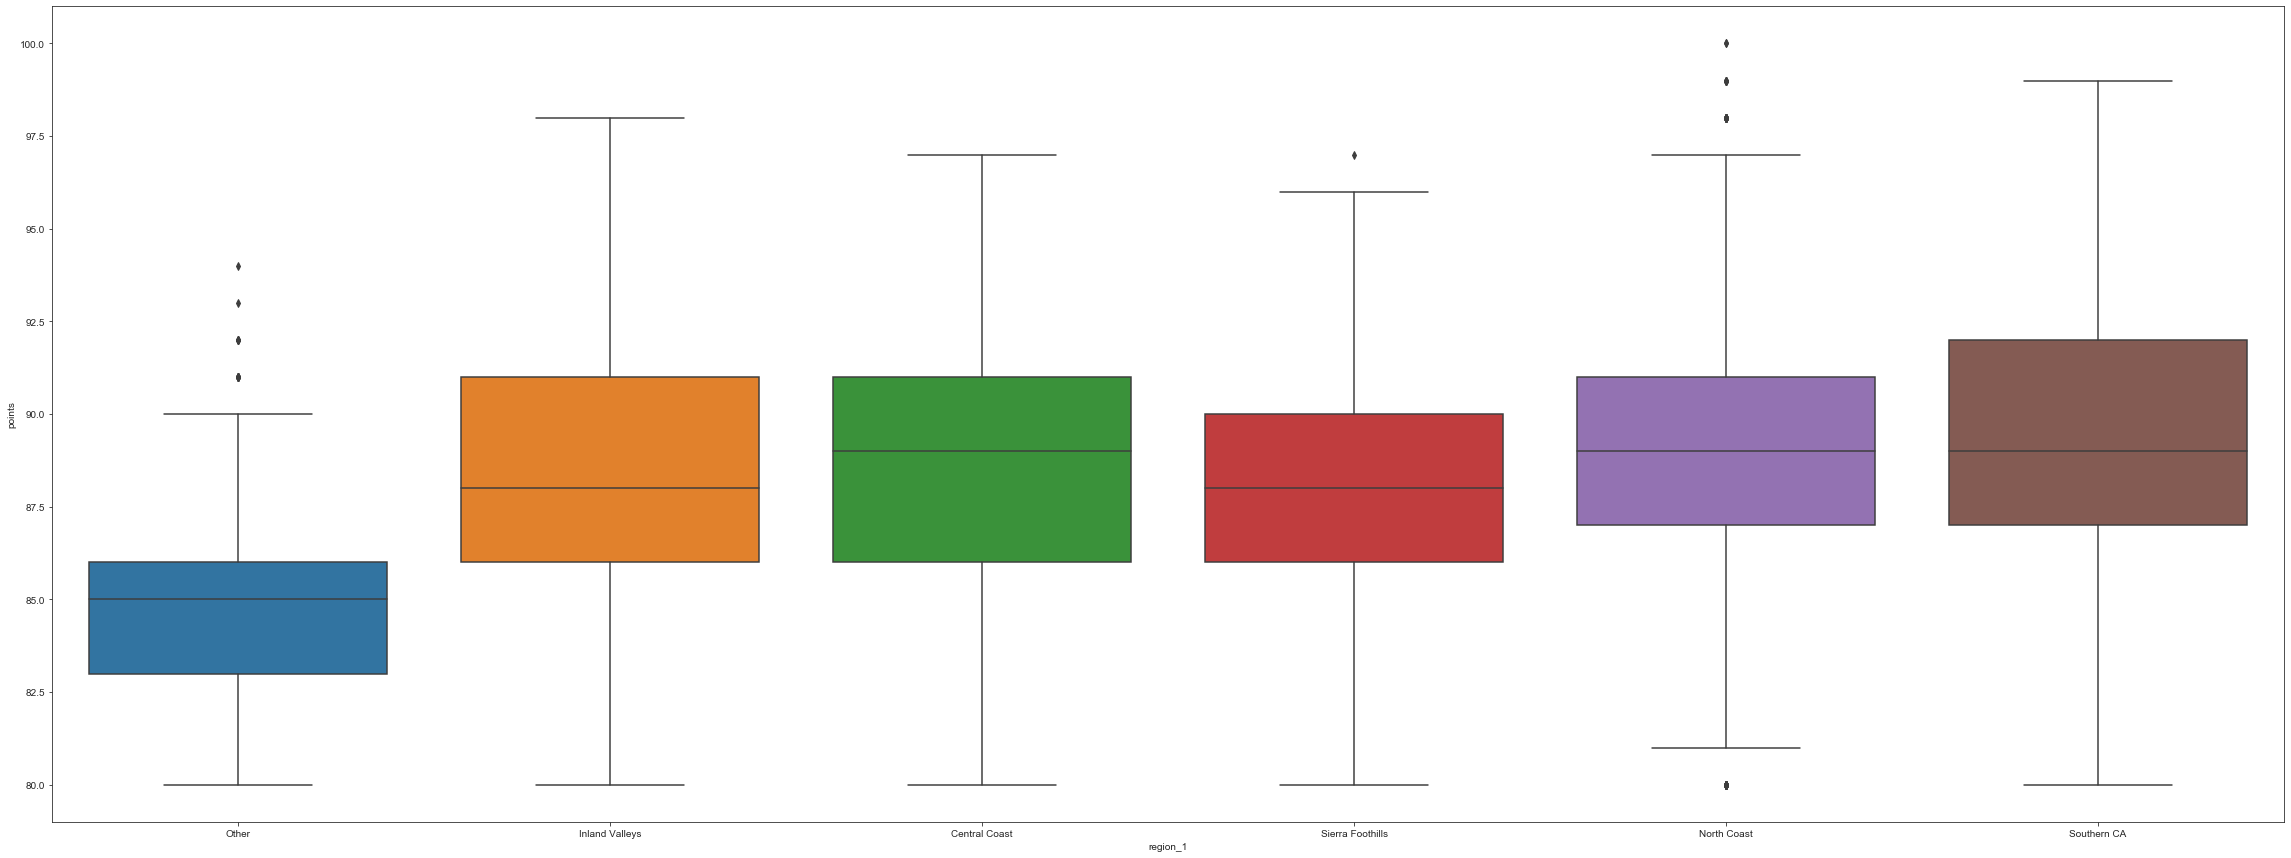

In [259]:
plt.figure(figsize=(40, 15))
sns.boxplot(x='region_1', y='points', data=Final_CAL_df);

In [260]:
CAL_model = ols('points ~ log_price + variety + taster_name + region_1', data= Final_CAL_df).fit()
CAL_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     359.6
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:19:45   Log-Likelihood:                -77135.
No. Observations:               32757   AIC:                         1.544e+05
Df Residuals:                   32693   BIC:                         1.549e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              75.8565      1.308     57.999      0.000      73.293      78.420
variety[T.Barbera]                     -1.8447      0.335     -5.515      0.000      -2.500      -1.189
variety[T.Bordeaux-style Red Blend]    -1.7158      0.287     -5.986      0.000      -2.278      -1.154
variety[T.Cabernet Franc]              -2.0349      0.305     -6.662      0.000      -2.634      -1.436
variety[T.Cabernet Sauvignon]          -1.5106      0.274     -5.509      0.000      -2.048      -0.973
variety[T.Cabernet Sauvignon-Syrah]    -1.5085      0.510     -2.961      0.003      -2.507      -0.510
variety[T.Carignane]                   -0.8984      0.561     -1.602      0.109      -1.998       0.201
variety[T.Champagne Blend]             -0.3750      0.431     -0.870      0.384      -1.219       0.469
variety[T.Chardonnay]                  -0.5762      0.273     -2.108      0.035      -1.112      -0.040
variety[T.Chenin Blanc]                 0.0932      0.410      0.228      0.820      -0.710       0.896
variety[T.Fumé Blanc]                   0.2345      0.423      0.554      0.579      -0.594       1.064
variety[T.G-S-M]                       -1.2175      0.370     -3.287      0.001      -1.944      -0.491
variety[T.Gewürztraminer]               0.3773      0.352      1.073      0.283      -0.312       1.066
variety[T.Grenache]                    -1.1123      0.304     -3.663      0.000      -1.707      -0.517
variety[T.Grenache Blanc]              -0.2554      0.384     -0.666      0.506      -1.008       0.497
variety[T.Malbec]                      -1.7765      0.331     -5.371      0.000      -2.425      -1.128
variety[T.Marsanne]                    -1.9464      0.569     -3.420      0.001      -3.062      -0.831
variety[T.Meritage]                    -1.8880      0.334     -5.645      0.000      -2.544      -1.232
variety[T.Merlot]                      -1.5366      0.280     -5.482      0.000      -2.086      -0.987
variety[T.Moscato]                     -0.1819      0.388     -0.469      0.639      -0.942       0.578
variety[T.Mourvèdre]                   -1.1872      0.361     -3.290      0.001      -1.895      -0.480
variety[T.Muscat Canelli]              -0.5004      0.561     -0.892      0.372      -1.600       0.599
variety[T.Nebbiolo]                    -0.6920      0.539     -1.284      0.199      -1.749       0.365
variety[T.Petit Verdot]                -2.1741      0.373     -5.825      0.000      -2.906      -1.443
variety[T.Petite Sirah]                -1.1494      0.289     -3.973      0.000      -1.716      -0.582
variety[T.Pinot Blanc]                  0.0377      0.436      0.086      0.931      -0.816       0.891
variety[T.Pinot Grigio]                -0.9607      0.313     -3.06

In [261]:
sm.stats.anova_lm(CAL_model)

,df,sum_sq,mean_sq,F,PR(>F)
variety,49.0,27795.055279,567.246026,87.110278,0.0
taster_name,8.0,24813.478498,3101.684812,476.316470,0.0
region_1,5.0,15138.965066,3027.793013,464.969127,0.0
log_price,1.0,79757.173206,79757.173206,12248.070807,0.0
Residual,32693.0,212890.773138,6.511815,NaN,NaN


# Up to here is done. Data has been totally cleaned. Just need to do the analysis. 

In [262]:
df_CAL.dtypes

country         object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

In [263]:
CAL_model.params

Intercept                              75.856525
variety[T.Barbera]                     -1.844706
variety[T.Bordeaux-style Red Blend]    -1.715770
variety[T.Cabernet Franc]              -2.034869
variety[T.Cabernet Sauvignon]          -1.510590
                                         ...    
region_1[T.North Coast]                 0.483856
region_1[T.Other]                      -0.103266
region_1[T.Sierra Foothills]            0.586644
region_1[T.Southern CA]                -0.209986
log_price                               3.282004
Length: 64, dtype: float64

In [264]:
df_CAL_SELECTION.describe()

,points,price,log_price
count,32757.000000,32757.000000,32757.000000
mean,88.624508,39.291358,3.482364
std,3.316990,30.941662,0.599958
min,80.000000,4.000000,1.386294
25%,86.000000,22.000000,3.091042
50%,89.000000,33.000000,3.496508
75%,91.000000,48.000000,3.871201
max,100.000000,2013.000000,7.607381


In [265]:
df_CAL_SELECTION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32757 entries, 0 to 32756
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      32757 non-null  object 
 1   points       32757 non-null  int64  
 2   price        32757 non-null  float64
 3   province     32757 non-null  object 
 4   region_1     32757 non-null  object 
 5   taster_name  32757 non-null  object 
 6   title        32757 non-null  object 
 7   variety      32757 non-null  object 
 8   winery       32757 non-null  object 
 9   log_price    32757 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


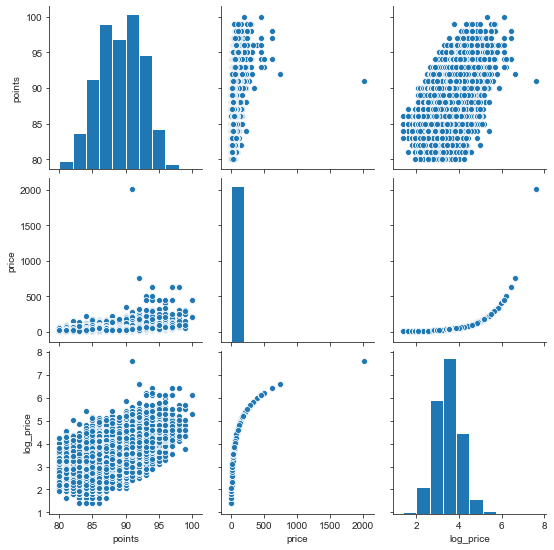

In [266]:
sns.axes_style("whitegrid")
sns.set_style('ticks')
sns.pairplot(df_CAL_SELECTION);

In [267]:
CAL_model = ols('points ~ price', data= df_CAL_SELECTION).fit()
CAL_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     8186.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:20:54   Log-Likelihood:                -82103.
No. Observations:               32757   AIC:                         1.642e+05
Df Residuals:                   32755   BIC:                         1.642e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7410      0.026   3273.657      0.000      86.689      86.793
price          0.0479      0.001     90.478      0.000       0.047       0.049
==============================================================================
Omnibus:                    14243.064   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1121257.507
Skew:                          -1.213   Prob(JB):                         0.00
Kurtosis:                      31.559   Cond. No.                         80.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
df_CAL['log_price']=np.log(df_CAL_SELECTION.price)

In [269]:
CAL_model = ols('points ~ log_price', data= df_CAL_SELECTION).fit()
CAL_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:20:54   Log-Likelihood:                -79343.
No. Observations:               32757   AIC:                         1.587e+05
Df Residuals:                   32755   BIC:                         1.587e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.6645      0.089    875.101      0.000      77.491      77.838
log_price      3.1473      0.025    125.313      0.000       3.098       3.197
==============================================================================
Omnibus:                      688.185   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.163
Skew:                          -0.348   Prob(JB):                    2.27e-155
Kurtosis:                       2.803   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_CAL_cm=df_CAL.corr(method='pearson') 
df_CAL_cm

In [80]:
CAL_model = ols('points ~ log_price + variety + taster_name + region_1', data= df_CAL_SELECTION).fit()
#CAL_model.summary()

C:\Users\ewright\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\ewright\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ewright\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ewright\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     55.34
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:                -39601.
No. Observations:               17721   AIC:                         7.963e+04
Df Residuals:                   17509   BIC:                         8.128e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         77.0384      1.219     63.179      0.000      74.648      79.428
variety[T.Barbera]                                                -0.5970      0.359     -1.664      0.096      -1.300       0.106
variety[T.Bordeaux-style Red Blend]                               -1.1179      0.322     -3.467      0.001      -1.750      -0.486
variety[T.Cabernet Franc]                                         -1.0843      0.342     -3.175      0.002      -1.754      -0.415
variety[T.Cabernet Sauvignon]                                     -0.9722      0.303     -3.210      0.001      -1.566      -0.379
variety[T.Cabernet Sauvignon-Syrah]                               -0.4957      0.632     -0.784      0.433      -1.734       0.743
variety[T.Carignane]                                               0.1883      0.558      0.338      0.736      -0.905       1.281
variety[T.Champagne Blend]                                        -0.6608      0.717     -0.921      0.357      -2.067       0.745
variety[T.Chardonnay]                                             -0.1662      0.301     -0.553      0.580      -0.756       0.423
variety[T.Chenin Blanc]                                            0.5967      0.444      1.343      0.179      -0.274       1.467
variety[T.Fumé Blanc]                                              0.6841      0.571      1.198      0.231      -0.435       1.803
variety[T.G-S-M]                                                   0.1436      0.411      0.349      0.727      -0.662       0.949
variety[T.Gewürztraminer]                                          0.9532      0.408      2.334      0.020       0.153       1.754
variety[T.Grenache]                                               -0.0228      0.331     -0.069      0.945      -0.673       0.627
variety[T.Grenache Blanc]                                          0.2160      0.413      0.523      0.601      -0.593       1.025
variety[T.Malbec]                                                 -0.8230      0.362     -2.277      0.023      -1.532      -0.114
variety[T.Marsanne]                                               -1.3183      0.682     -1.932      0.053      -2.656       0.019
variety[T.Meritage]                                               -0.8855      0.394     -2.246      0.025      -1.658      -0.113
variety[T.Merlot]                                                 -0.8899      0.315     -2.830      0.005      -1.506      -0.273
variety[T.Moscato]                                                -0.3687      0.472     -0.782      0.434      -1.293       0.556
variety[T.Mourvèdre]                                               0.2

In [85]:
df_CAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33524 entries, 10 to 129952
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      33524 non-null  object 
 1   points       33524 non-null  int64  
 2   price        33524 non-null  float64
 3   province     33524 non-null  object 
 4   region_1     33524 non-null  object 
 5   taster_name  18211 non-null  object 
 6   title        33524 non-null  object 
 7   variety      33524 non-null  object 
 8   winery       33524 non-null  object 
 9   log_price    32757 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.8+ MB
